# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | santa luzia
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | marti
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | rexburg
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | north potomac
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | nantucket
Processing Record 22 of Set 1 | hithadhoo
Pro

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,21.22,58,96,4.61,GL,1670746090
1,anadyr,64.7500,177.4833,10.90,85,100,29.08,RU,1670746314
2,ushuaia,-54.8000,-68.3000,42.46,75,75,20.71,AR,1670746315
3,albany,42.6001,-73.9662,26.64,76,100,1.01,US,1670746199
4,bredasdorp,-34.5322,20.0403,67.95,90,100,16.98,ZA,1670746315


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,21.22,58,96,4.61,GL,1670746090
1,anadyr,64.7500,177.4833,10.90,85,100,29.08,RU,1670746314
2,ushuaia,-54.8000,-68.3000,42.46,75,75,20.71,AR,1670746315
3,albany,42.6001,-73.9662,26.64,76,100,1.01,US,1670746199
4,bredasdorp,-34.5322,20.0403,67.95,90,100,16.98,ZA,1670746315


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

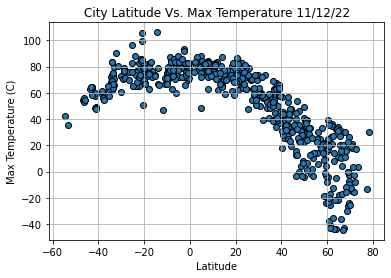

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature 11/12/22")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

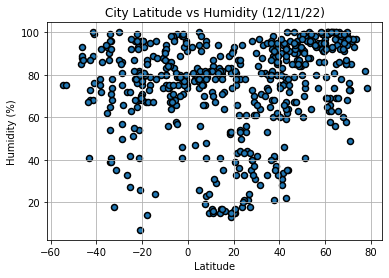

In [28]:
# Build the scatter plots for each city types
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidth=1.5, marker="o", 
           label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("city_latitude_vs_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

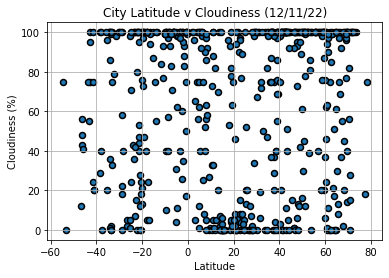

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1.5, marker="o", 
             label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude v Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latitude_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

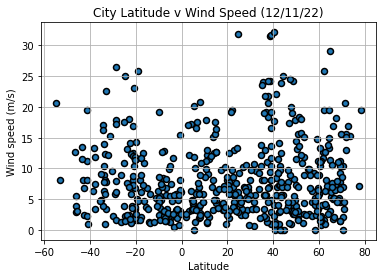

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1.5, marker="o", 
             label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude v Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latitude_v_windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,21.22,58,96,4.61,GL,1670746090
1,anadyr,64.7500,177.4833,10.90,85,100,29.08,RU,1670746314
3,albany,42.6001,-73.9662,26.64,76,100,1.01,US,1670746199
5,jamestown,42.0970,-79.2353,37.02,46,100,9.22,US,1670746274
7,kodiak,57.7900,-152.4072,33.31,93,100,9.22,US,1670746315


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,42.46,75,75,20.71,AR,1670746315
4,bredasdorp,-34.5322,20.0403,67.95,90,100,16.98,ZA,1670746315
6,santa luzia,-19.7697,-43.8514,67.10,96,97,1.57,BR,1670746315
8,mataura,-46.1927,168.8643,55.51,93,56,2.91,NZ,1670746316
10,port alfred,-33.5906,26.8910,75.18,96,99,1.01,ZA,1670746316


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7660906136710016


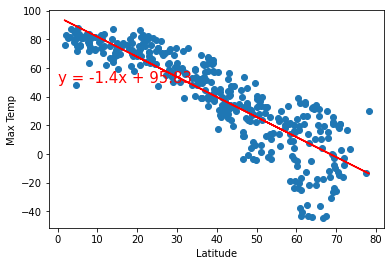

In [34]:
# Linear regression on Northern Hemisphere


x_values = northern_hemisphere_df ['Lat']
y_values = northern_hemisphere_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()





The r-squared is: 0.298399071657848


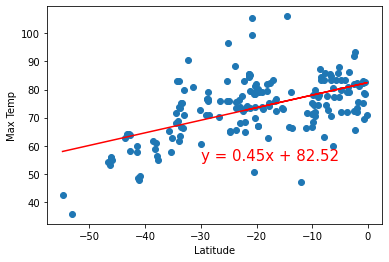

In [49]:
# Linear regression on Southern Hemisphere

x_values = southern_hemisphere_df ['Lat']
y_values = southern_hemisphere_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [36]:
#There is strong negative correlation between latitude and temperature on Northern Hemisphere. As latitude increases max temperature decreases.
#There is weak positive correlation between latitude and temperature on Southern Hemisphere. As latitude increases max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1806049823509641


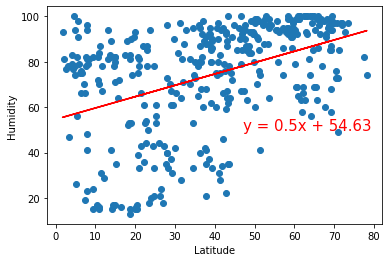

In [37]:
# Northern Hemisphere

x_values = northern_hemisphere_df ['Lat']
y_values = northern_hemisphere_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006491369059515979


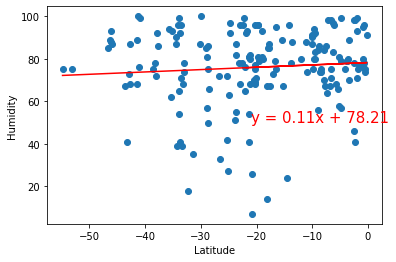

In [38]:
# Southern Hemisphere
x_values = southern_hemisphere_df ['Lat']
y_values = southern_hemisphere_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-21,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [39]:
#weak positive correlation between Humidity and Latitude in northern and southern hemispheres. As latitude increases humidity tends to increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05070724344560465


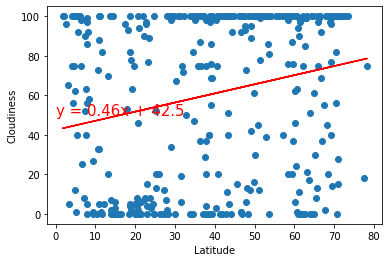

In [40]:
# Northern Hemisphere
x_values = northern_hemisphere_df ['Lat']
y_values = northern_hemisphere_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07774144164113399


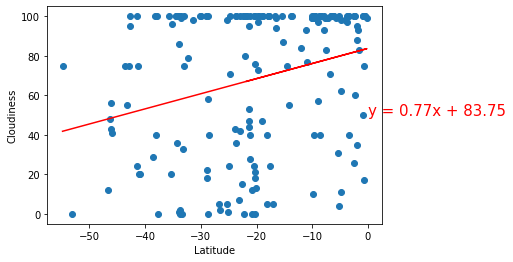

In [41]:
# Southern Hemisphere
x_values = southern_hemisphere_df ['Lat']
y_values = southern_hemisphere_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [42]:
# Weak positive correlation between Cloudiness and Latitude in northern and southern hemispheres

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0033057801957350405


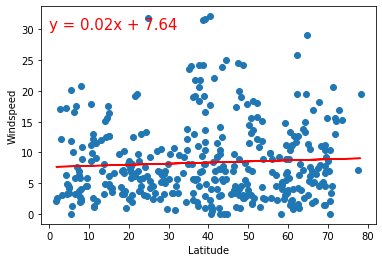

In [43]:
# Northern Hemisphere
x_values = northern_hemisphere_df ['Lat']
y_values = northern_hemisphere_df ['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.08437961313604042


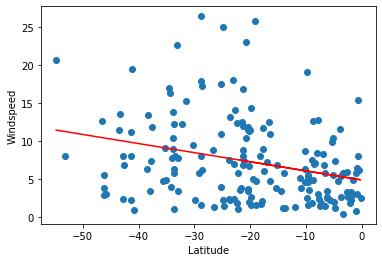

In [44]:
# Southern Hemisphere
x_values = southern_hemisphere_df ['Lat']
y_values = southern_hemisphere_df ['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [45]:
#R squared is close to 0 so near to no correlation. i.e Weak positive correlation between latitude and windspeed in northern hemisphere
#Weak negative correlation between latitude and windspeed in southern hemisphere